# Numpy Basics


Numpy is a core library of many scientific packages in Python. Its highly optimized and written largely in C and is critical for performing complex calculations as quckly as possible. It provides some basic data structures, like the Numpy Array, that we'll be using extensively (or other libraries will be using under the hood).

The numpy array is similar to a python list, save that is is wrapped in a numpy class called `ndarray`.

In [1]:
import numpy as np

array = np.array([1,2,3,4,5])

# Numpy supports many attributes on the ndarray
print(type(array))
print(array)
print(array.shape)
print(array.size)
print(array.ndim)
print(array.dtype)


<class 'numpy.ndarray'>
[1 2 3 4 5]
(5,)
5
1
int64


By default numpy is giving me an array of type int64. Assuming I wanted something else, you can force the type with the `dtype` kwarg.

In [2]:
array = np.array([1,2,3,4,5], dtype=np.float64)
print(array)
print(array.dtype)

[1. 2. 3. 4. 5.]
float64


In [3]:
array = np.array([1.0, 2.2, 3.3], dtype=np.int8)
print(array)


[1 2 3]



You can also change the type of an ndarray after the fact

In [4]:
array = array.astype(np.float64)
print(array)

[1. 2. 3.]



Ndarrays can also be used for more interesting things. The `nd` after all stands for __N-Dimensional__, so we can have much more complicated matrices

In [5]:
array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(type(array))
print(array)
print(array.shape)
print(array.size)
print(array.ndim)
print(array.dtype)


<class 'numpy.ndarray'>
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
12
2
int64



Like Python's lists, Numpy's arrays can be accessed by index, are iterable, and are __sliceable__

In [6]:
for i in range(array.shape[0]):
    for j in range(array.shape[1]):
        print(array[i][j])

print("\n\n")
        
for row in array:
    for element in row:
        print(element)

print("\n\n")

# Note the difference between the slicing styles!
print(array[1:][:3])

print(array[1:, :3])



1
2
3
4
5
6
7
8
9
10
11
12



1
2
3
4
5
6
7
8
9
10
11
12



[[ 5  6  7  8]
 [ 9 10 11 12]]
[[ 5  6  7]
 [ 9 10 11]]


### Operators and Numpy

Ndarrays supporrt most python operators, and will usually do what you expect


In [7]:
array + array

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24]])

In [8]:
array * 2

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24]])

In [9]:
array - 1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
array % 2

array([[1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0]])

In [11]:
array == 3

array([[False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False]])

In [12]:
array != 1

array([[False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])


Numpy also supports vector and matrix operations

In [13]:
a = np.array([[1,2], [2,3]])
b = np.array([[5,6], [2,3]])

a.dot(b)

array([[ 9, 12],
       [16, 21]])

In [14]:
np.matmul(a, b)

array([[ 9, 12],
       [16, 21]])

In [15]:
# Transpose
np.array([[1,1], [2,3]]).T

array([[1, 2],
       [1, 3]])


You can use the fact that numpy works with boolean operators to index into numpy arrays and return subsets of the data based on specific criteria.

In [16]:
index = array < 5
print(array[index])

[1 2 3 4]


In [17]:
print(array[(array < 5) & (array > 2)])

[3 4]


In [18]:
print(array[(array < 5) | (array > 10)])

[ 1  2  3  4 11 12]


### Ndarray Methods

Ndarrays supports a myriad of methods, a few of the most useful are listed below:

* sum
* mean
* std
* min
* max
* min
* max
* sqrt


In [19]:
array = np.ones(5)
print(array)

[1. 1. 1. 1. 1.]


In [20]:
array.sum()

5.0

In [21]:
array.mean()

1.0

In [22]:
array = np.array([1,2,3,4,5])
print(array.min())
print(array.max())

1
5


In [23]:
array.std()

1.4142135623730951

Numpy also supports an extensive library of other methods designed for linear algebra and scientific computing. A very useful one is `Polynomial` which can be used for fitting a line. Lets generate a random data set, and attempt to fit a line to it.

In [24]:
import matplotlib.pyplot as plt

X = np.linspace(0.0, 20.0, 100)
Y = 0.2 + 0.05 * X + 0.4 * np.sin(X) + 0.1 * np.random.normal(size = (100))

plt.figure(1)
plt.clf()
            
plt.plot(X, Y, 'o-')
plt.draw()


This data plot might be best described as a noisy sine wave. 

In [25]:
import numpy.polynomial.polynomial as poly

# Polyfit will generate coefficients, the 3rd argument is degrees of fitting
coefficients = poly.polyfit(X, Y, 2)
fit = poly.polyval(X, coefficients)


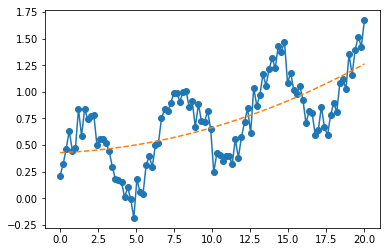

In [26]:
plt.figure(1)
plt.clf()
            
plt.plot(X, Y, 'o-', X, fit, '--')
plt.draw()

We'll need to scale up the number of degrees, but keep in mind, the higher the number, the longer the operation can take. Fitting the line too precisely can also lead to overfitting.

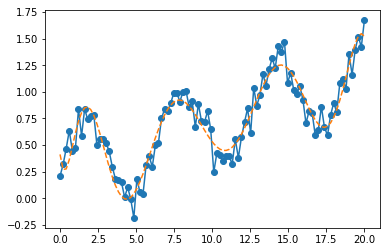

In [27]:
coefficients = poly.polyfit(X, Y, 10)
fit = poly.polyval(X, coefficients)
plt.figure(1)
plt.clf()
            
plt.plot(X, Y, 'o-', X, fit, '--')
plt.draw()

### Working with Missing Data

Many datasets are incomplete - that is, they have missing data. There are many ways we can handle missing data - we can normalize it, ignore it, or drop it completely. Let's look at some examples of how numpy represents missing data.

In [28]:
data = np.array([1,2,3,4, None])
print(data)
print(data.dtype)


[1 2 3 4 None]
object


Generally you do not want to be working with object data, unless the data in question is string, or stringlike. Numpy typically represents missing data with the NaN identifier (not a number). None, or empty string, might be a good representation for missing data in a string array, but for numeric vectors, we'll want to make sure the missing data is NaN. This will force the type of the data to float. You cannot have an array with NaN in it of type float.

In [29]:
data = np.array([1,2,3,4, None], dtype=np.float64)
print(data)

# this will cause an exception
data = np.array([1,2,3,4, None], dtype=np.int64)
print(data)

[ 1.  2.  3.  4. nan]


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

Missing data can be filtered out many ways. An easy choice is to use boolean indexing

In [31]:
data = np.array([1,2,3,4, np.nan])
print(data[~np.isnan(data)])


[1. 2. 3. 4.]


You can also replace missing values with something else, like the mean of the data.

In [32]:
data = np.array([4.2,2.7,3.4,4.9, np.nan])
data[np.isnan(data)] = data.mean()
print(data)

[4.2 2.7 3.4 4.9 nan]


It didnt work! What happened? `mean` by dedfault does not ignore NaNs. Most of the numpy methods will not. Numpy does have a special method we can use here called `nanmean` if you want to find the mean before removing the missing data.

In [33]:
data = np.array([4.2,2.7,3.4,4.9, np.nan])
data[np.isnan(data)] = np.nanmean(data)
print(data)

[4.2 2.7 3.4 4.9 3.8]


We can also opt to remove entire rows that have missing data

In [34]:
data = np.array([[1,2,4], [3,5,6], [4, np.nan, 5], [1,2,3]])
print(data)
print()
print(data[~np.isnan(data).any(axis=1)])

[[ 1.  2.  4.]
 [ 3.  5.  6.]
 [ 4. nan  5.]
 [ 1.  2.  3.]]

[[1. 2. 4.]
 [3. 5. 6.]
 [1. 2. 3.]]


We can use a mask and then apply the `any` method on it to remove any rows that are not true in every column (hence the axis=1 argument).